In [1]:
## Enable matplotlib inline
%matplotlib inline

## Imports
import pandas as pd
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

import numpy as np
from sklearn import ensemble

In [2]:
## Read in training data
train = pd.read_csv('train.csv')

In [3]:
## Read in testing data
test = pd.read_csv('test.csv')

In [5]:
## Make a function to prepare the data for training and testing
def process_data(dataset):
    id_groups = dataset.groupby('Id')
    return id_groups.mean()

In [6]:
## Process training and testing data
train = process_data(train)
test  = process_data(test)

In [8]:
## Clean up training data from outliers
train = train[train['Expected'] < 500.0]

In [16]:
train

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,29.083333,2,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,0.998611,0.993611,0.998333,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
4,28.153846,9,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,0.988333,NaN,0.988333,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
6,29.833333,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
7,30.933333,13,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,15.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508000
8,31.083333,8,19.600000,18.083333,19.200000,24.863636,24.590909,22.250000,23.727273,28.590909,0.931667,0.936667,0.993333,1.014524,1.156250,-0.593750,0.531250,1.026786,0.002499,-3.963338,-0.217506,3.734997,3.225002
9,28.384615,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.288010
10,27.333333,10,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,0.835833,0.945833,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000


In [17]:
train['Expected'].median()

1.0160004999999999

In [18]:
train['Expected'].mean()

10.109879972933962

In [24]:
splitpoint = int(len(train)/2)
train1 = train[:splitpoint]
train2 = train[splitpoint:]

In [25]:
train1

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,,,
1,29.833333,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,29.083333,2,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,0.998611,0.993611,0.998333,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
3,30.750000,10,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,26.162014
4,28.153846,9,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,0.988333,NaN,0.988333,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,4.064002
6,29.833333,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
7,30.933333,13,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,15.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508000
8,31.083333,8,19.600000,18.083333,19.200000,24.863636,24.590909,22.250000,23.727273,28.590909,0.931667,0.936667,0.993333,1.014524,1.156250,-0.593750,0.531250,1.026786,0.002499,-3.963338,-0.217506,3.734997,3.225002
9,28.384615,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.288010
10,27.333333,10,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,0.835833,0.945833,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000


In [26]:
train2

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,,,
591000,29.133333,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051667,NaN,NaN,NaN,0.604167,NaN,NaN,NaN,3.899994,0.254000
591001,29.466667,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
591002,30.812500,10,NaN,NaN,NaN,NaN,6.500000,NaN,NaN,6.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.470100
591003,30.090909,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064002
591004,30.600000,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972083,0.926111,0.987917,1.022000,0.164062,-0.708333,0.070312,1.850000,0.679993,-3.461672,-0.263756,4.788883,0.508000
591005,29.727273,0,-4.727273,-12.875000,-6.454545,5.409091,0.863636,-7.954545,-1.136364,13.681818,0.934630,0.603750,0.915909,1.011970,1.791667,-2.140625,1.982955,5.647727,-1.410004,NaN,-1.059998,4.409996,0.254000
591006,29.909091,3,19.818182,14.772727,19.000000,23.045455,24.909091,21.136364,24.090909,27.409091,0.978636,0.956212,0.983788,0.997121,0.295455,-0.375000,0.403409,1.369318,0.105998,-2.202861,-0.063639,2.909994,0.508000
591007,31.272727,10,NaN,NaN,NaN,8.500000,7.500000,NaN,NaN,10.625000,NaN,NaN,NaN,1.015000,NaN,NaN,NaN,-6.312500,NaN,NaN,NaN,1.059998,23.876013
591008,31.533333,14,12.500000,NaN,NaN,12.500000,12.500000,NaN,NaN,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000


In [27]:
train1 = train1.fillna(-1111.0)
train2 = train2.fillna(-1111.0)

In [28]:
## Extract numpy arrays to pass to scikit-learn for training
train_data   = train1[['radardist_km', 'Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp']].values
train_target = train1['Expected'].values

In [33]:
## Train the Boosted Regression trees
regressor = ensemble.GradientBoostingRegressor(max_depth=4, n_estimators=400)
regressor.fit(train_data, train_target)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [34]:
def predict(radardist_km, Ref, RefComposite, RhoHV, Zdr, Kdp):
    return regressor.predict([radardist_km, Ref, RefComposite, RhoHV, Zdr, Kdp])[0]

In [35]:
train2['Predicted'] = map(
    predict,
    train2['radardist_km'],
    train2['Ref'],
    train2['RefComposite'],
    train2['RhoHV'],
    train2['Zdr'],
    train2['Kdp']
)

In [36]:
train2

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected,Predicted
Id,,,,,,,,,,,,,,,,,,,,,,,,
591000,29.133333,11,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,1.051667,-1111.000000,-1111.000000,-1111.000000,0.604167,-1111.000000,-1111.000000,-1111.000000,3.899994,0.254000,8.554778
591001,29.466667,15,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,0.254000,6.511189
591002,30.812500,10,-1111.000000,-1111.000000,-1111.000000,-1111.000000,6.500000,-1111.000000,-1111.000000,6.500000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,204.470100,62.497632
591003,30.090909,14,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,4.064002,7.656025
591004,30.600000,9,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,0.972083,0.926111,0.987917,1.022000,0.164062,-0.708333,0.070312,1.850000,0.679993,-3.461672,-0.263756,4.788883,0.508000,-2.810124
591005,29.727273,0,-4.727273,-12.875000,-6.454545,5.409091,0.863636,-7.954545,-1.136364,13.681818,0.934630,0.603750,0.915909,1.011970,1.791667,-2.140625,1.982955,5.647727,-1.410004,-1111.000000,-1.059998,4.409996,0.254000,1.617494
591006,29.909091,3,19.818182,14.772727,19.000000,23.045455,24.909091,21.136364,24.090909,27.409091,0.978636,0.956212,0.983788,0.997121,0.295455,-0.375000,0.403409,1.369318,0.105998,-2.202861,-0.063639,2.909994,0.508000,1.636942
591007,31.272727,10,-1111.000000,-1111.000000,-1111.000000,8.500000,7.500000,-1111.000000,-1111.000000,10.625000,-1111.000000,-1111.000000,-1111.000000,1.015000,-1111.000000,-1111.000000,-1111.000000,-6.312500,-1111.000000,-1111.000000,-1111.000000,1.059998,23.876013,61.724128
591008,31.533333,14,12.500000,-1111.000000,-1111.000000,12.500000,12.500000,-1111.000000,-1111.000000,12.500000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,0.254000,5.395302


In [37]:
import matplotlib.pyplot as plt

In [56]:
def twod(var1, var2):

    x = train2[var1].values
    y = train2[var2].values

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    fig, ax = plt.subplots()

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

    plt.hexbin(x, y, cmap=plt.cm.YlOrRd_r, gridsize=1000, bins='log')
    plt.axis([xmin, xmax, ymin, ymax])
    cb = plt.colorbar()


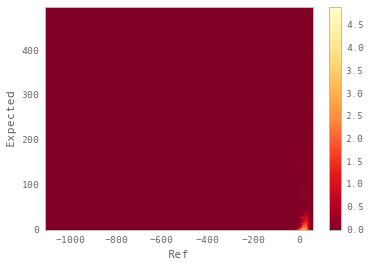

In [58]:
twod('Ref', 'Expected')

In [49]:
Emma = 'Emma'; I = 'I '; love = 'love '

In [50]:
I + love + Emma

'I love Emma'